In [1]:
# Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# path to clean file with data
clean_file = 'Resources/HomeValue_clean.csv'

#read file to DataFrame
homes_value_orig_df = pd.read_csv(clean_file)

In [23]:
homes_value_orig_df

,County,State,Home Type,Avg house price
0,Los Angeles,CA,4 bedroom,722251.25
1,San Diego,CA,4 bedroom,698838.33
2,Orange,CA,4 bedroom,860278.42
3,Riverside,CA,4 bedroom,448650.92
4,San Bernardino,CA,4 bedroom,444484.50
...,...,...,...,...
332,Mono,CA,5 bedroom,1166818.33
333,Trinity,CA,5 bedroom,394104.17
334,Modoc,CA,5 bedroom,210738.33
335,Sierra,CA,5 bedroom,459396.92


In [4]:
homes_value_orig_df['Home Type'].unique()

array(['4 bedroom', 'single family', '1 bedroom.csv', '2 bedroom.csv',
       'condo', '5 bedroom'], dtype=object)

In [63]:
# choose data for each home type
one_bedroom = homes_value_orig_df[homes_value_orig_df['Home Type'] == '1 bedroom']
one_bedroom = one_bedroom.sort_values('Avg house price')

two_bedroom = homes_value_orig_df[homes_value_orig_df['Home Type'] == '2 bedroom']
two_bedroom = two_bedroom.sort_values('Avg house price')

three_bedroom = homes_value_orig_df[homes_value_orig_df['Home Type'] == '3 bedroom']
three_bedroom = three_bedroom.sort_values('Avg house price')

four_bedroom = homes_value_orig_df[homes_value_orig_df['Home Type'] == '4 bedroom']
four_bedroom = four_bedroom.sort_values('Avg house price')

five_bedroom = homes_value_orig_df[homes_value_orig_df['Home Type'] == '5 bedroom']
five_bedroom = five_bedroom.sort_values('Avg house price')

condo = homes_value_orig_df[homes_value_orig_df['Home Type'] == 'condo']
condo = condo.sort_values('Avg house price')

cheapest_place_ca = one_bedroom.head(10) 
cheapest_place_ca = pd.concat([cheapest_place_ca, two_bedroom.head(10)], ignore_index=True)
cheapest_place_ca = pd.concat([cheapest_place_ca, three_bedroom.head(10)], ignore_index=True)
cheapest_place_ca = pd.concat([cheapest_place_ca, four_bedroom.head(10)], ignore_index=True)
cheapest_place_ca = pd.concat([cheapest_place_ca, five_bedroom.head(10)], ignore_index=True)
cheapest_place_ca = pd.concat([cheapest_place_ca, condo.head(10)], ignore_index=True)

cheapest_place_ca

,County,State,Home Type,Avg house price
0,Modoc,CA,4 bedroom,193472.92
1,Imperial,CA,4 bedroom,220204.58
2,Lassen,CA,4 bedroom,259788.08
3,Kings,CA,4 bedroom,280814.67
4,Kern,CA,4 bedroom,286456.83
5,Siskiyou,CA,4 bedroom,290211.17
6,Tulare,CA,4 bedroom,294634.58
7,Glenn,CA,4 bedroom,296069.75
8,Sierra,CA,4 bedroom,309974.42
9,Tehama,CA,4 bedroom,310872.17


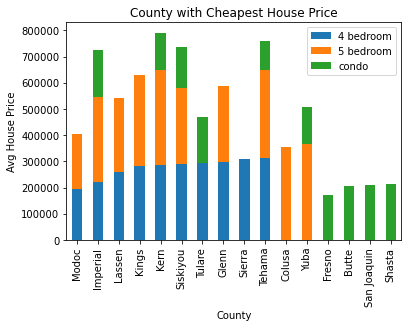

In [58]:
cheapest_4bd = cheapest_place_ca.loc[cheapest_place_ca['Home Type'] == '4 bedroom', ['County', 'Avg house price']]
cheapest_5bd = cheapest_place_ca.loc[cheapest_place_ca['Home Type'] == '5 bedroom', ['County', 'Avg house price']]
cheapest_condo = cheapest_place_ca.loc[cheapest_place_ca['Home Type'] == 'condo', ['County', 'Avg house price']]

cheap_plot = cheapest_4bd.merge(cheapest_5bd, on='County', how='outer', suffixes=('_4bd', '_5bd'))
cheap_plot = cheap_plot.merge(cheapest_condo, on='County', how='outer')

cheap_plot = cheap_plot.set_index('County')
cheap_plot = cheap_plot.rename(columns={'Avg house price_4bd': '4 bedroom'
                                        , 'Avg house price_5bd': '5 bedroom' , 'Avg house price': 'condo'})

cheap_plot.plot(kind='bar', stacked=True)

plt.title("County with Cheapest House Price")
plt.ylabel("Avg House Price")

plt.show()

